<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Taxa_de_distor%C3%A7%C3%A3o_Ensino_do_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
#**Análise da Taxa distorção Ensino do RS**

Analisando a taxa distorção ensino do RS através de mapa com objetivo de treinamento para curso de análise de dados.

***
***
> Fontes:
>
>
>[Mapa da taxa distorção ensino RS](https://dados.rs.gov.br/dataset/fee-taxa-de-distorcao-idade-serie-total-102524/resource/b3c6d6d6-e23c-4d7b-a368-2c5817113958)<br>
>[Aula 3](https://www.youtube.com/watch?v=zpNtiJsJ7KY) <br>
>[Folium](https://python-visualization.github.io/folium/quickstart.html) <br>
>
![Alt Text](https://media.giphy.com/media/l378asbpIR5DTsdqg/giphy.gif)<br>
>
>[Portifolio de Projetos](https://www.youtube.com/watch?v=LJrK4B7bNWA) <br>
> 



In [1]:
# pip permite instalar novas bibliotecas
# ! permite a execução de comandos no colab
!pip install folium

In [2]:
# importando as bibliotecas
import pandas as pd
%matplotlib inline
import folium

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/V1L3La/Learning-An-lise-de-Dados-em-Python/main/2013-taxa-de-distorcao-idade-serie-total-102524.csv', encoding = 'latin1',skiprows=1)  
df

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"
...,...,...,...,...,...
490,Vista Alegre do Prata,4323606,-28.80520,-51.79460,"2,6"
491,Vista Gaúcha,4323705,-27.29020,-53.69740,"10,9"
492,Vitória das Missões,4323754,-28.35160,-54.50400,"26,8"
493,Westfalia,4323770,-29.37440,-51.74630,"15,8"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Município                                495 non-null    object 
 1   ibge                                     495 non-null    int64  
 2   latitude                                 495 non-null    float64
 3   longitude                                495 non-null    float64
 4   /Educação/Ens...de Série/Total 2013 (-)  495 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [5]:
# Renomear coluna
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'Tx_Distorção'}, inplace = True)
df

,Município,ibge,latitude,longitude,Tx_Distorção
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"
...,...,...,...,...,...
490,Vista Alegre do Prata,4323606,-28.80520,-51.79460,"2,6"
491,Vista Gaúcha,4323705,-27.29020,-53.69740,"10,9"
492,Vitória das Missões,4323754,-28.35160,-54.50400,"26,8"
493,Westfalia,4323770,-29.37440,-51.74630,"15,8"


In [6]:
# Converter Tx_Distorção para float e mudando virgula por ponto
df['Tx_Distorção'] = df['Tx_Distorção'].str.replace(',','.').astype(float)
df

,Município,ibge,latitude,longitude,Tx_Distorção
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9
...,...,...,...,...,...
490,Vista Alegre do Prata,4323606,-28.80520,-51.79460,2.6
491,Vista Gaúcha,4323705,-27.29020,-53.69740,10.9
492,Vitória das Missões,4323754,-28.35160,-54.50400,26.8
493,Westfalia,4323770,-29.37440,-51.74630,15.8


In [7]:
df.nsmallest(10, 'Tx_Distorção')

,Município,ibge,latitude,longitude,Tx_Distorção
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [8]:
df.nlargest(10, 'Tx_Distorção', keep='last')

,Município,ibge,latitude,longitude,Tx_Distorção
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


![Alt Text](https://media.giphy.com/media/W0cp9tTEKFPh7MbNtd/giphy.gif)

In [9]:
# plotando o histograma

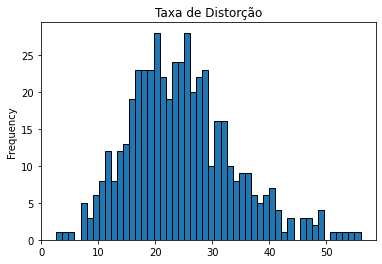

In [10]:
df['Tx_Distorção'].sort_values(ascending=False).plot.hist(title='Taxa de Distorção', bins=50, edgecolor='black')

In [11]:
# Quantidade de municípios com tx_distorção menor ou igual a 10
df[(df['Tx_Distorção'] <= 10)].count()

Município       17
ibge            17
latitude        17
longitude       17
Tx_Distorção    17
dtype: int64

In [12]:
# Quantidade de municípios com tx_distorção maior ou igual a 45
df[(df['Tx_Distorção'] >= 45)].count()

Município       17
ibge            17
latitude        17
longitude       17
Tx_Distorção    17
dtype: int64

### MAPA
![Alt Text](https://media.giphy.com/media/dzUT9cGW996BiHYMhe/giphy.gif)

[Mapa do Brasil no Google](https://www.google.com.br/maps/place/Brasil/@-13.6970969,-69.7609493,4z/data=!3m1!4b1!4m5!3m4!1s0x9c59c7ebcc28cf:0x295a1506f2293e63!8m2!3d-14.235004!4d-51.92528)
>

In [13]:
# Vamos aprender como o folium funciona
# criar um mapa com base em uma coordenada central

In [14]:
brasil = folium.Map(
    location=[-13.6970969, -69.7609493], 
    zoom_start=4
)

# mostrando mapa
brasil

In [15]:
# criar mapa do RS
rs = folium.map

rs = folium.Map(
    #location=[-30.33209, -58.1651595],
    location=[-30.5, -52], # localização ajustada

    zoom_start=7
)

# mostrando mapa
rs

In [16]:
# Percorrer o dataframe com base nas melhores e piores escolas(Tx_Distorção <= 10)
# e desenhar um marcador para cada escola
# usando for e iterrows

# iterrows = percorra da primeira até a última linha
# folium.Marker = Cria um marcador

for indice, municipio in df[df['Tx_Distorção'] <= 10].iterrows():   
  folium.Marker(
      location=[municipio['latitude'], municipio['longitude']], #Pega Lat. e Long.
      popup=municipio['Município'], #Pega nome do município 
      icon=folium.map.Icon(color='green') # cria marcador e põe no mapa
  ).add_to(rs)  # coloca no mapa

for indice, municipio in df[df['Tx_Distorção'] >= 45].iterrows():   
  folium.Marker(
      location=[municipio['latitude'], municipio['longitude']], #Pega Lat. e Long.
      popup=municipio['Município'], #Pega nome do município 
      icon=folium.map.Icon(color='red') # cria marcador e põe no mapa
  ).add_to(rs)  # coloca no mapa
rs

In [17]:
# Qual a taxa de distorção de Porto Alegre?
df[df['Município'] == 'Porto Alegre']['Tx_Distorção']

325    32.3
Name: Tx_Distorção, dtype: float64

In [18]:
# https://www.youtube.com/watch?v=hyDvL_CzbX4